# Twitter Sentiment Analysis
---

This script can tell you the sentiments of people regarding to any events happening in the world by analyzing tweets related to that event. It will search for tweets about any topic and analyze each tweet to see how positive or negative it's emotion is. 

---
## Overview

The basic idea behind this project is to know how people are reacting to events, celebrities, music, movies, sports whatsoever going around the world. Luckily we have a large database of people from all around the globe where they share their emotions- Twitter!. So we can just dive into this large pool of emotions (Twitter) and extract data of our interest. This will be the purpose of our script.

1. To extract the tweets related to my desired Hash Tag/Keyword
2. Analyze the words in each tweet to find out whether the tweet is positive or negative (Happy or Sad) using **Natural Language Processing**
3. Find the results for bulk of tweets to get the sentiments of majority.

---
## Natural Language Processing (NLP) Brief Overview

For computer the tweets are just a bunch of words. That’s all. Computer does not know what words mean or what emotions the words carry. To find that, we will use NLP. We will use `TextBlob` for analyzing sentences we got by `pip`. To install it, you just need to type this simple query into command prompt:
```cmd
pip install textblob
```

---
## Twitter API

Twitter Application Program Interface or API allow us to access some of the internal functionalities of the server, which in our case is searching for tweets. You can use twitter API but first you’ll need to create an app in twitter. Follow the steps below.

Login into your twitter account. Go to apps and click on create new app.

![caption](https://i0.wp.com/www.letscodepro.com/wp-content/uploads/2017/08/Sentiments-1.png?resize=768%2C535)

Now fill up the information for your app and click on create app.

![caption](https://photos-6.dropbox.com/t/2/AABvkiq_34tcO0piLJTV6tquzXFJr0z9u-6LP-NRIIN68A/12/421895909/png/32x32/1/_/1/2/twitterAPI.png/EPqHpbEDGIdCIAIoAg/maPaEaOETCaW10oY7XZkCfF2HuvXGO8eX2MZkVPb9zo?preserve_transparency=1&size=1600x1200&size_mode=3)

Now click on **Keys and Access Tokens**. *Generate Consumer Key and Consumer Secret* if it’s not there. That’s it. Now we can move on to the coding part. Copy *Consumer Key*, *Consumer Secret*, *Access Token* and *Access Token Secret*. We will need them later.

---
## Tweepy Module

To use twitter API in our script, we will need Tweepy module. You can install it through pip.
```cmd
pip install tweepy
```

---
## Implementation

Now we have the necessary modules installed, we can move on to the coding part.

We begin by importing those modules.

In [1]:
import sys, tweepy, csv, re
from textblob import TextBlob
import matplotlib.pyplot as plt

---
### Main Function

As necessary modules imported, we begin creating the main function to access Twitter API and download data.

In [2]:
# function to access Twitter API and download data
def DownloadData():
    # authenticating
    consumerKey = 'KIX8qu01ofoaZCXeBuup3Dz5r'
    consumerSecret = 'lhQyezRxjw3uvd6gw23pqh9x4FU1yZxbNJhDILAKMkoDM4w7I8'
    accessToken = '967781002180403200-SczQK656HH6UHr52uhzjcvnTYlq8xiz'
    accessTokenSecret = 's3tTgKJHe7JBWWiHsAFSZUOVH9CzImSnf7JjWuELJtmqk'
    auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
    auth.set_access_token(accessToken, accessTokenSecret)
    api = tweepy.API(auth)

    # input for term to be searched and how many tweets to search
    searchTerm = input("Enter Keyword/Tag to search about: ")
    NoOfTerms = int(input("Enter how many tweets to search: "))

    # searching for tweets
    tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

    # open/create a file to append data to
    csvFile = open('result.csv', 'a')

    # use csv writer
    csvWriter = csv.writer(csvFile)

    # creating some variables to store info
    polarity = 0
    positive = 0
    wpositive = 0
    spositive = 0
    negative = 0
    wnegative = 0
    snegative = 0
    neutral = 0

    tweetText = []
    
    # iterating through tweets fetched
    for tweet in tweets:
        # append to temp so that we can store in csv later. I use encode UTF-8
        tweetText.append(cleanTweet(tweet.text).encode('utf-8'))
        # print (tweet.text.translate(non_bmp_map)) # print tweet's text
        analysis = TextBlob(tweet.text)
        # print(analysis.sentiment) # print tweet's polarity
        polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

        if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
            neutral += 1
        elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
            wpositive += 1
        elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
            positive += 1
        elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
            spositive += 1
        elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
            wnegative += 1
        elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
            negative += 1
        elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
            snegative += 1

    # write to csv and close csv file
    csvWriter.writerow(tweetText)
    csvFile.close()

    # finding average of how people are reacting
    positive_percentage = percentage(positive, NoOfTerms)
    wpositive_percentage = percentage(wpositive, NoOfTerms)
    spositive_percentage = percentage(spositive, NoOfTerms)
    negative_percentage = percentage(negative, NoOfTerms)
    wnegative_percentage = percentage(wnegative, NoOfTerms)
    snegative_percentage = percentage(snegative, NoOfTerms)
    neutral_percentage = percentage(neutral, NoOfTerms)

    # finding average reaction
    polarity = polarity / NoOfTerms

    # printing out data to input
    print("How people are reacting on '" + searchTerm + "' by analyzing " + str(NoOfTerms) + " tweets.")
    print()
    print("General Report: ")

    if (polarity == 0):
        print("Neutral")
    elif (polarity > 0 and polarity <= 0.3):
        print("Weakly Positive")
    elif (polarity > 0.3 and polarity <= 0.6):
        print("Positive")
    elif (polarity > 0.6 and polarity <= 1):
        print("Strongly Positive")
    elif (polarity > -0.3 and polarity <= 0):
        print("Weakly Negative")
    elif (polarity > -0.6 and polarity <= -0.3):
        print("Negative")
    elif (polarity > -1 and polarity <= -0.6):
        print("Strongly Negative")

    # printing out results
    print()
    print("Detailed Report: ")
    print(str(positive) + " out of " + str(NoOfTerms) + " people thought it was positive")
    print(str(wpositive) + " out of " + str(NoOfTerms) + " people thought it was weakly positive")
    print(str(spositive) + " out of " + str(NoOfTerms) + " people thought it was strongly positive")
    print(str(negative) + " out of " + str(NoOfTerms) + " people thought it was negative")
    print(str(wnegative) + " out of " + str(NoOfTerms) + " people thought it was weakly negative")
    print(str(snegative) + " out of " + str(NoOfTerms) + " people thought it was strongly negative")
    print(str(neutral) + " out of " + str(NoOfTerms) + " people thought it was neutral")

    # printing out results in Pie Chart
    plotPieChart(positive_percentage, wpositive_percentage, spositive_percentage, negative_percentage, wnegative_percentage, snegative_percentage, neutral_percentage, searchTerm, NoOfTerms)

We created the main method using these 10 simple steps:

1. Authentication

    We have to first authenticate with our Twitter API consumer details and access token. We can do that using `OAuthHandler` method from `tweepy` with our consumer key and secret, and also use its `set_access_token` method with our access token and secret as the arguments. After that, we finalize by creating a variable to store API access named `api`.
```python
# authenticating
consumerKey = 'insert-consumer-key'
consumerSecret = 'insert-consumer-secret-key'
accessToken = 'insert-access-token'
accessTokenSecret = 'insert-access-secret-token'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)
```

2. Search for Tweets

    After authenticated our access to Twitter API, we might as well begin searching for keyword that we'll going to input later in the argument. `searchTerm` represents the keyword, and `NoOfTerms` represents how many tweets we requested. We can begin searching by using `Cursor()` method from `tweepy` with later-defined keyword and count as the parameter.
```python
# input for term to be searched and how many tweets to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))
```
```python
# searching for tweets
tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)
```

3. Create search results file

    When the keyword has been searched, we need to create a file to later store the search results and analyze them. We can do this using csv open/create and write method
```python
# open/create a file to append data to
csvFile = open('result.csv', 'a')
```
```python
# use csv writer
csvWriter = csv.writer(csvFile)
```

4. Define variables

    Other than polarity, we divided the result into 7 category, which are:
    - Strongly Positive
    - Positive
    - Weakly Positive
    - Neutral
    - Weakly Negative
    - Negative
    - Strongly Negative
```python
# creating some variables to store info
polarity = 0
positive = 0
wpositive = 0
spositive = 0
negative = 0
wnegative = 0
snegative = 0
neutral = 0
tweetText = []
```

5. Write search results

    After search result has came up, we can write each of them into `tweetText` and analyze the polarity using `TextBlob`
```python
# iterating through tweets fetched
for tweet in tweets:
    # append to temp so that we can store in csv later. I use encode UTF-8
    tweetText.append(cleanTweet(tweet.text).encode('utf-8'))
    # print (tweet.text.translate(non_bmp_map)) # print tweet's text
    analysis = TextBlob(tweet.text)
    # print(analysis.sentiment) # print tweet's polarity
    polarity += analysis.sentiment.polarity  # adding up polarities to find the average later
```

6. Categorize results

    We can now convert search result into our defined category. These are the category qualifications:
    - Strongly Positive `(0.6 < x <= 1)`
    - Positive `(0.3 < x <= 0.6)`
    - Weakly Positive `(0 < x <= 0.3)`
    - Neutral `(x = 0)`
    - Weakly Negative `(0 > x >= -0.3)`
    - Negative `(-0.3 > x >= -0.6)`
    - Strongly Negative `(-0.6 > x >= -1)`
```python
        if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
            neutral += 1
        elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
            wpositive += 1
        elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
            positive += 1
        elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
            spositive += 1
        elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
            wnegative += 1
        elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
            negative += 1
        elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
            snegative += 1
```

7. Print results

    The categorized results are now ready to be printed. We printed out results using usual `print` method and generate pie chart by `matplotlib.pyplot`.
```python
# printing out results
print()
print("Detailed Report: ")
print(str(positive) + "out of " + str(NoOfTerms) + " people thought it was positive")
print(str(wpositive) + "out of " + str(NoOfTerms) + " people thought it was weakly positive")
print(str(spositive) + "out of " + str(NoOfTerms) + " people thought it was strongly positive")
print(str(negative) + "out of " + str(NoOfTerms) + " people thought it was negative")
print(str(wnegative) + "out of " + str(NoOfTerms) + " people thought it was weakly negative")
print(str(snegative) + "out of " + str(NoOfTerms) + " people thought it was strongly negative")
print(str(neutral) + "out of " + str(NoOfTerms) + " people thought it was neutral")
```
```python
# printing out results in Pie Chart
plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)
```

---
### Other Functions

We need 3 additional functions in order to keep our main function clean and pretty. Here are those 3 additional functions:

1. `cleanTweet()`
    
    This method is used to clean links, special characters, emoticons, etc from tweets fetched using Twitter API

2. `percentage`

    This method is used to turn result count into a percentage
    
3. `plotPieChart()`

    This method is used to display the result in a pie chart

In [3]:
# function to clean special links, characters, emoticons, etc from tweet
def cleanTweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

In [4]:
# function to calculate percentage
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [5]:
def plotPieChart(positive_percentage, wpositive_percentage, spositive_percentage, negative_percentage, wnegative_percentage, snegative_percentage, neutral_percentage, searchTerm, noOfSearchTerms):
    labels = ['Positive [' + str(positive_percentage) + '%]', 'Weakly Positive [' + str(wpositive_percentage) + '%]','Strongly Positive [' + str(spositive_percentage) + '%]', 'Neutral [' + str(neutral_percentage) + '%]',
              'Negative [' + str(negative_percentage) + '%]', 'Weakly Negative [' + str(wnegative_percentage) + '%]', 'Strongly Negative [' + str(snegative_percentage) + '%]']
    sizes = [positive_percentage, wpositive_percentage, spositive_percentage, neutral_percentage, negative_percentage, wnegative_percentage, snegative_percentage]
    colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
    [patches, texts] = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title('How people are reacting on "' + searchTerm + '" by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

---
## Results

Now the program has been created, we can finally use it to good use. In this case, find out how people are reacting on **piracy** by analyzing 1000 tweets.

Enter Keyword/Tag to search about: piracy
Enter how many tweets to search: 1000
How people are reacting on 'piracy' by analyzing 1000 tweets.

General Report: 
Weakly Positive

Detailed Report: 
99 out of 1000 people thought it was positive
334 out of 1000 people thought it was weakly positive
22 out of 1000 people thought it was strongly positive
50 out of 1000 people thought it was negative
58 out of 1000 people thought it was weakly negative
5 out of 1000 people thought it was strongly negative
432 out of 1000 people thought it was neutral


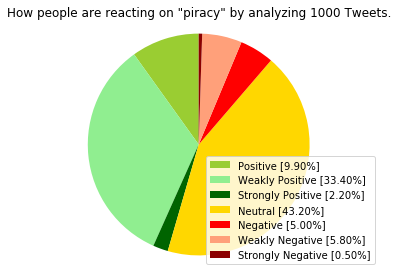

In [6]:
DownloadData()

As you can see, the biggest counts between the emotion we have categorized are **Weakly Positive** and **Neutral**. We might always get a lot of **Neutral** case because some people use slangs in their tweets that we are not able to categorized.

After a brief moment of understanding the detailed report, we can assumed that a lot of people on the internet enjoy having the ability to get free stuff like movies, music, or games illegally. You can see that only a total of 11.30% of them responded somewhat negative.

Enter Keyword/Tag to search about: pirate
Enter how many tweets to search: 1000
How people are reacting on 'pirate' by analyzing 1000 tweets.

General Report: 
Weakly Positive

Detailed Report: 
98 out of 1000 people thought it was positive
133 out of 1000 people thought it was weakly positive
59 out of 1000 people thought it was strongly positive
18 out of 1000 people thought it was negative
95 out of 1000 people thought it was weakly negative
7 out of 1000 people thought it was strongly negative
590 out of 1000 people thought it was neutral


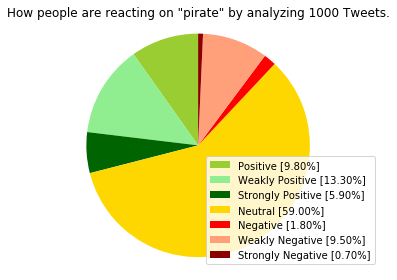

In [7]:
DownloadData()

Let's try some new keywords. We thought that **pirate** instead of **piracy** might get some attention to the matter, but after we read the tweet list in the csv file, there is only 10% of them who were actually talking about internet pirate, with the rest meant ship pirate. So, we cannot use this analysis. Worth a try though.

Enter Keyword/Tag to search about: torrent
Enter how many tweets to search: 1000
How people are reacting on 'torrent' by analyzing 1000 tweets.

General Report: 
Weakly Positive

Detailed Report: 
180 out of 1000 people thought it was positive
147 out of 1000 people thought it was weakly positive
24 out of 1000 people thought it was strongly positive
25 out of 1000 people thought it was negative
309 out of 1000 people thought it was weakly negative
10 out of 1000 people thought it was strongly negative
303 out of 1000 people thought it was neutral


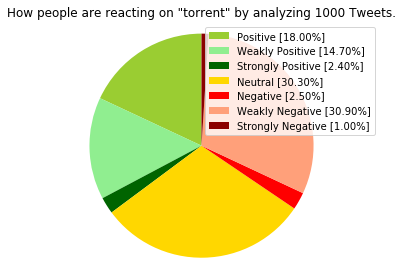

In [9]:
DownloadData()

Now let's get to the technical stuff. **Torrent** means *a large amount of water that is moving quickly*. But after seeing the result, we saw that most of them were actually talking about **Torrent File** or **Torrent Site**. **Torrent File** usually refers to a computer file that contains metadata holding various information. A torrent file normally comes with the extension .torrent but it does not contain the actual contents to be distributed.